<a href="https://colab.research.google.com/github/MicroprocessorX069/Pytorch-dataloader-types/blob/master/Pytorch_Data_Loaders_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Basic imports

In [0]:
import torch 
import torchvision
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets
import os
from PIL import Image
import glob
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import random
from bokeh.io import curdoc, show, output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from functools import partial
from threading import Thread
from tornado import gen
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

##MNIST

##CIFAR 10

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

170500096it [00:02, 69944488.26it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


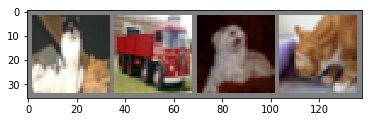

  cat truck   dog   cat


In [9]:
print("Size of train set",len(trainloader))
print("Size of train set",len(testloader))



# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


##Custom Data loader template 

##Pair wise image mapping Data loader
Images with same label in two folder train A and train B

##Pair wise image mapping Data loader with one OCR image and a text generated image
Image with label in folder train. Pair image generated using label

In [0]:
class localImageDataset(torch.utils.data.Dataset):
  def __init__(self,data_dir,inp_width, inp_height, inp_channels):
    #Image list in the folder data
    self.data_dir=data_dir
    self.inp_width=inp_width
    self.inp_height=inp_height
    self.inp_channels=inp_channels
    
    self.image_list = []
    for filename in glob.glob('data/*.jpg'):
        self.image_list.append(filename)
        
    #image transformations from 1920x1280 to 240x160
    self.data_transform=transforms.Compose([
        transforms.Resize(size=160, interpolation=2),
        transforms.RandomResizedCrop((160,240)),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.486,0.406],[0.229,0.224,0.225])
    ])
    
  def __getitem__(self,index):
    
    #reading the images nad label as filenames
    image=Image.open(self.image_list[index])
    label=os.path.splitext(self.image_list[index])[0][5:]
    
    #Synthetic paired image
    font = ImageFont.load_default().font
    font = ImageFont.truetype("C:/Windows/Fonts/ARLRDBD.ttf",190)
    img=Image.new("RGB", (self.inp_width,self.inp_height),(0,0,0))
    draw = ImageDraw.Draw(img)
    text_strtPt=(random.randint(300,500),random.randint(500,750))
    draw.text(text_strtPt,label,(255,255,255),font=font)
    draw = ImageDraw.Draw(img)
    
    #Transforming the data
    image=self.data_transform(image)
    syn_image=self.data_transform(img)
    
    #print(image.size)
    #returning a data pair ( image,label)
    return image,syn_image
  
  def __len__(self):
    return len(self.image_list)
